In [43]:
# pip install pandas
# pip install PySimpleGUI

import pandas as pd
import PySimpleGUI as psgui
import datetime as dt
import matplotlib

In [41]:
from dataclasses import dataclass
from datetime import datetime
from sqlite3 import DatabaseError


csvfile = "C:\\Lokaal\\SCRIPTS\\git_personal\\time-invoice-mgt\\data\\data.csv"

df = pd.read_csv(csvfile, sep= ";")

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

#df['Date'].max()

#filt = (df['Date'] >= '2022-06-01')

filt = (df['Date'] >= '2022-06-01')

df.loc[filt]

df.set_index("Date", inplace=True)

df

#print(df.loc[mask])



,Day,Hours,Bank Holidays,OffDay,Hours 100,Hours 150,Hours 200,Standby,DayRate,Omzet,Standbyrate,Column1
Date,,,,,,,,,,,,
2016-01-01,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,0,250,NaN
2016-01-02,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,0,250,NaN
2016-01-03,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,0,250,NaN
2016-01-04,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,0,250,NaN
2016-01-05,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550,0,250,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665,0,250,NaN
2023-02-21,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665,0,250,NaN
2023-02-22,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665,0,250,NaN


In [42]:
%matplotlib inline


C:\Users\HYW470\AppData\Local\Temp\ipykernel_12416\3834157487.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2 = df['2022']
C:\Users\HYW470\AppData\Local\Temp\ipykernel_12416\3834157487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hours 100'] = df['Hours 100'].str.replace(',', '.').astype(float)


<AxesSubplot: xlabel='Date'>

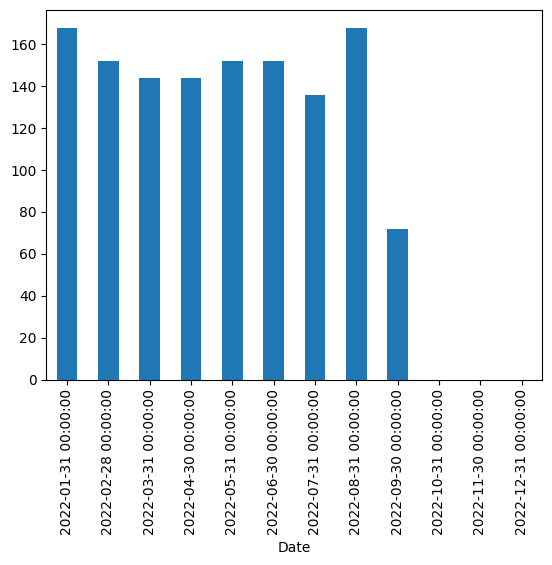

In [58]:
df2 = df['2022']
df2['Hours 100'] = df['Hours 100'].str.replace(',', '.').astype(float)
hourspermonth = df2['Hours'].resample('M').sum()
overtimepermonth = df2['Hours 100'].resample('M').sum()
hourspermonth.plot.bar()
df2.columns
overtimepermonth.plot.bar()